### Exploratory Analysis of Data Breaches in the United States

#### Resources
- [Show all row and columns settings](https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf)

#### TODO:
1. Tranform column data into row data
2. Import vcdb schema as a pandas dataframe to look up questions related to specific fields ex. schema_df.loc['data_field']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

In [2]:
# Additional Options
# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14

In [3]:
# pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [44]:
# Using csv file
df = pd.read_csv('./data/vcdb_source.csv', low_memory=False)
df.head()

action.environmental.notes  action.environmental.variety.Deterioration  \
0                        NaN                                       False   
1                        NaN                                       False   
2                        NaN                                       False   
3                        NaN                                       False   
4                        NaN                                       False   

   action.environmental.variety.Earthquake  action.environmental.variety.EMI  \
0                                    False                             False   
1                                    False                             False   
2                                    False                             False   
3                                    False                             False   
4                                    False                             False   

   action.environmental.variety.ESD  action.environmental.variety.Fire  \
0                             False                              False   
1                             False                              False   
2                             False                              False   
3                             False                              False   
4                             False                              False   

   action.environmental.variety.Flood  action.environmental.variety.Hazmat  \
0                               False                                False   
1                               False                                False   
2                               False                                False   
3                               False                                False   
4                               False                                False   

   action.environmental.variety.Humidity  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   action.environmental.variety.Hurricane  action.environmental.variety.Ice  \
0                                   False                             False   
1                                   False                             False   
2                                   False                             False   
3                                   False                             False   
4                                   False                             False   

   action.environmental.variety.Landslide  action.environmental.variety.Leak  \
0                                   False                              False   
1                                   False                              False   
2                                   False                              False   
3                                   False                              False   
4                                   False                              False   

   action.environmental.variety.Lightning  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   action.environmental.variety.Meteorite  action.environmental.variety.Other  \
0                                   False                               False   
1                                   False                               False   
2                                   False                               False   
3                                   False                               False   
4                                   False                               False   

   action.environmental.variety.Particulates  \
0                                      False   
1                                      False   
2                          

In [6]:
df.shape

(9108, 2550)

### Steps to take in EDA
1. Assess Missing Values
2. Assess Numerical Variable
3. Distribution of the Numerical Variable
4. Assess Categorical Variables
5. Cardinality of Categorical Variables (What that mean???)
6. Outliers
7. Relationship between independent and dependent features against the outcome of a data breach and security incident)


In [13]:
# Missing Values
# check percentage of nan values present in each feature

# create list of features which has missing values
features_with_nan = [features for features in df.columns if df[features].isnull().sum() > 1]

# print feature name and percentage missing values
for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean() * 100, 4), ' % missing values')

action.environmental.notes 99.989  % missing values
action.error.notes 95.9816  % missing values
action.hacking.cve 98.8142  % missing values
action.hacking.notes 96.4097  % missing values
action.malware.cve 98.1994  % missing values
action.malware.name 97.4418  % missing values
action.malware.notes 98.8252  % missing values
action.misuse.notes 98.5617  % missing values
action.physical.notes 99.6487  % missing values
action.social.notes 99.3083  % missing values
action.unknown.notes 99.4291  % missing values
actor.external.name 97.9798  % missing values
actor.external.notes 92.8634  % missing values
actor.external.region 48.6166  % missing values
actor.internal.notes 98.3092  % missing values
actor.partner.industry 95.8718  % missing values
actor.partner.name 99.8902  % missing values
actor.partner.notes 98.2543  % missing values
actor.partner.region 95.8718  % missing values
actor.unknown.notes 99.6816  % missing values
asset.assets.amount.E - Other 100.0  % missing values
asset.asset

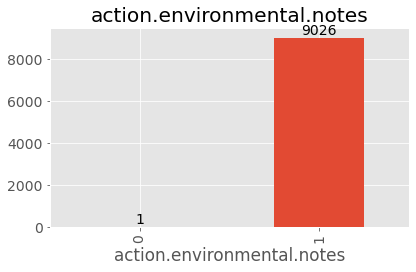

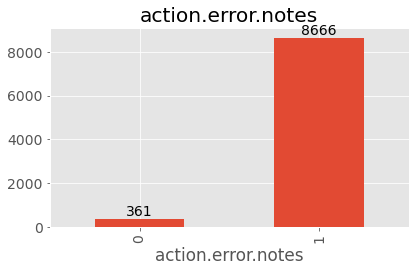

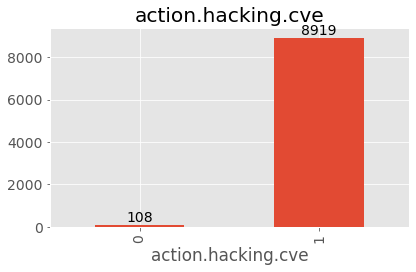

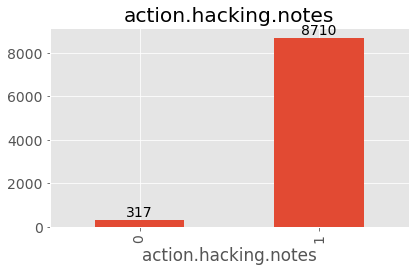

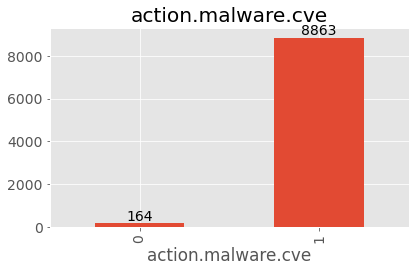

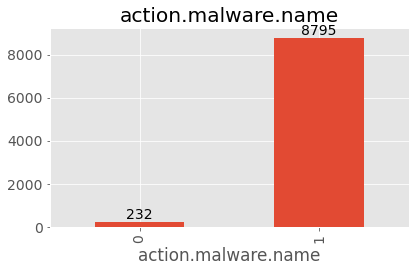

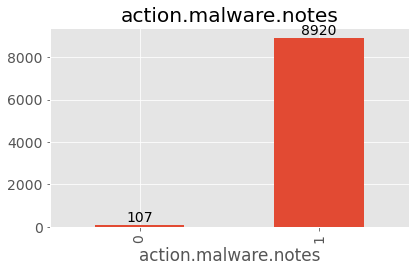

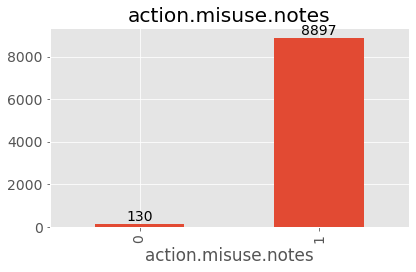

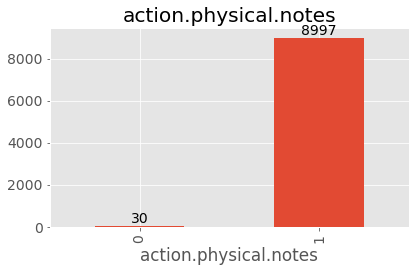

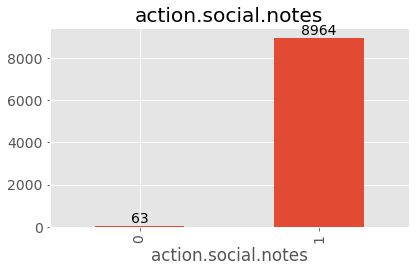

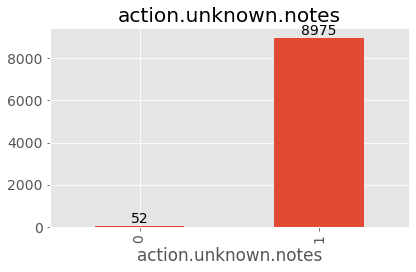

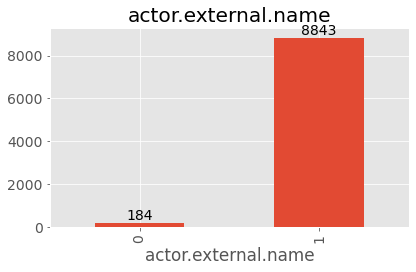

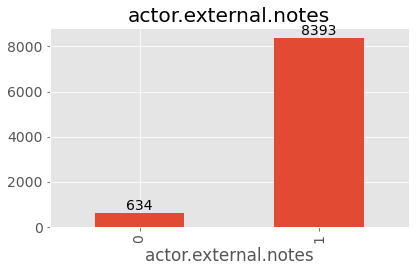

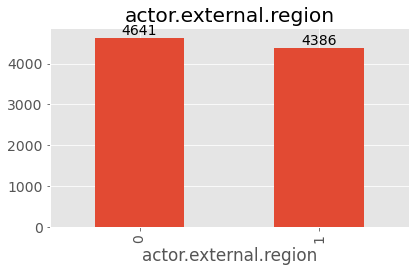

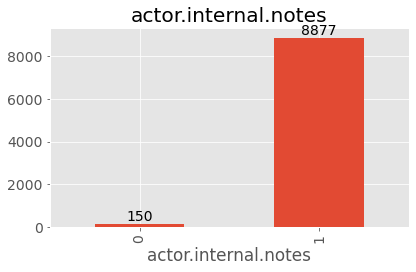

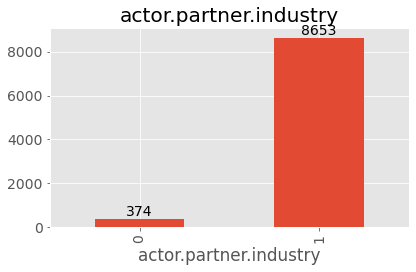

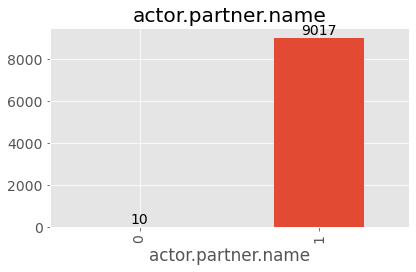

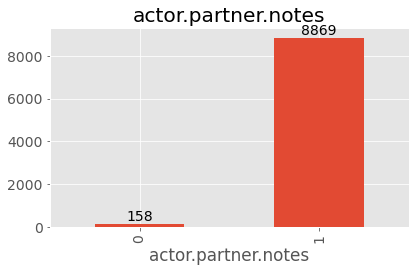

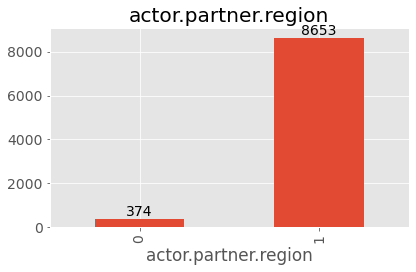

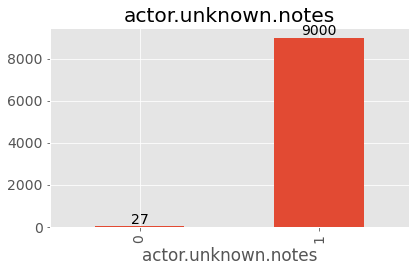

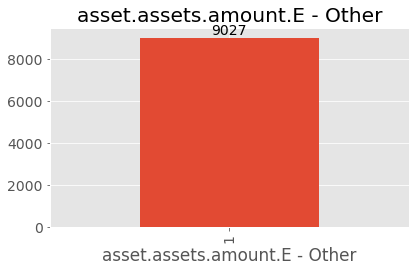

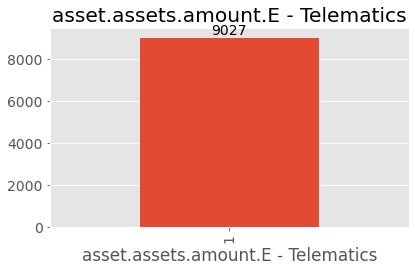

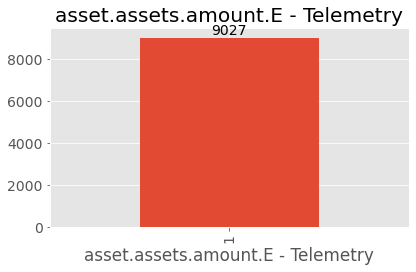

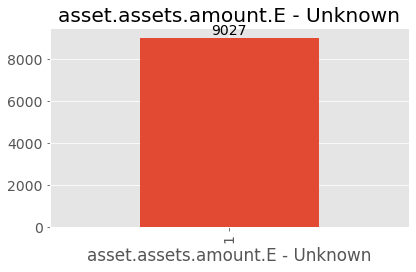

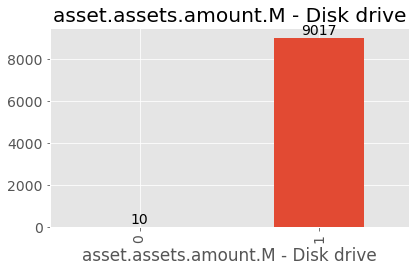

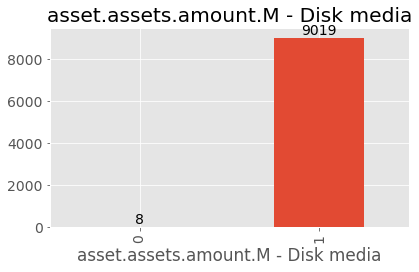

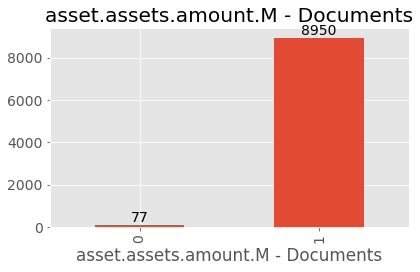

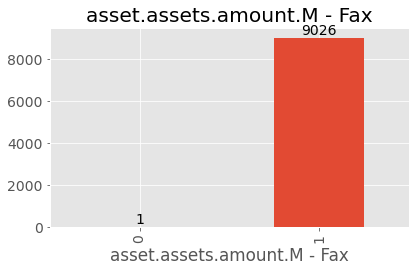

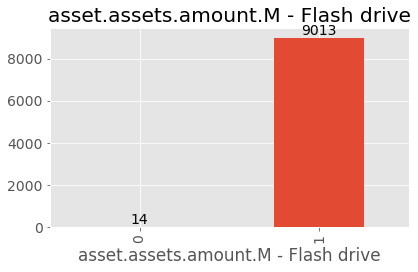

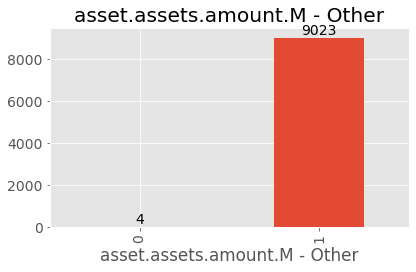

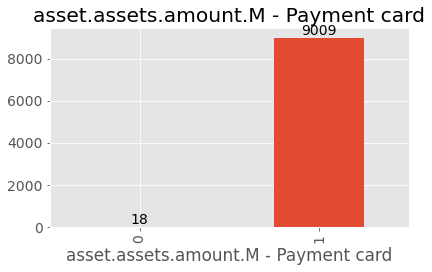

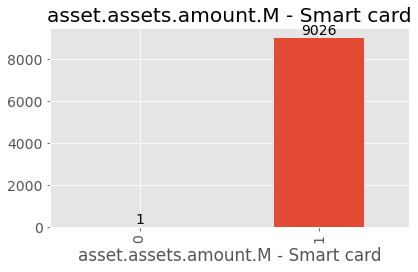

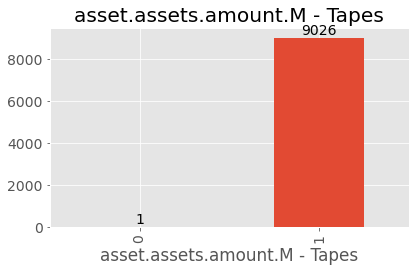

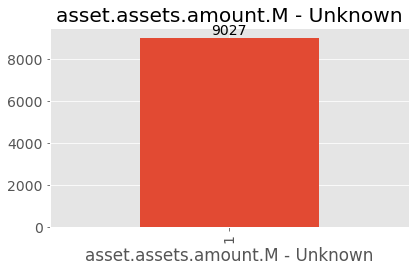

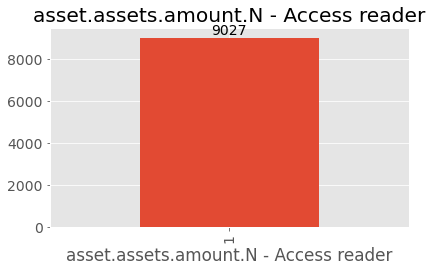

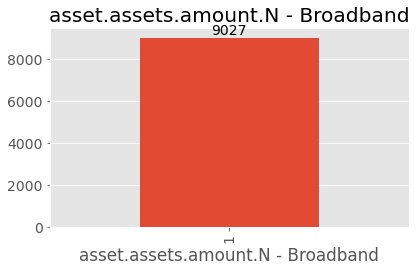

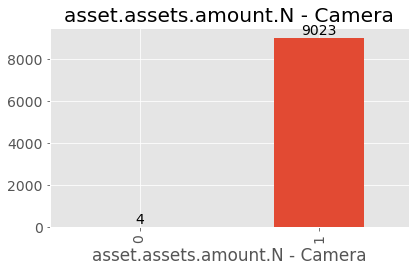

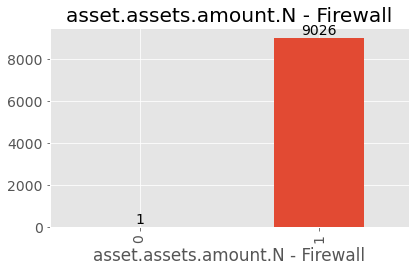

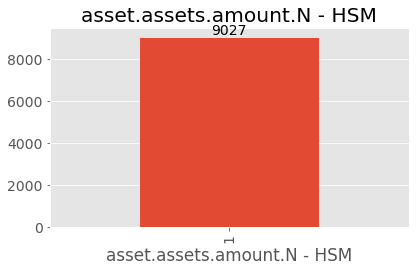

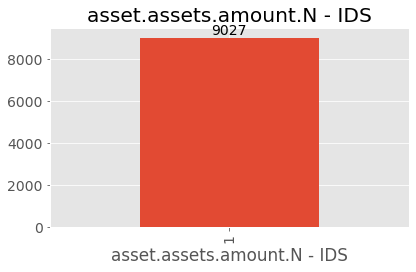

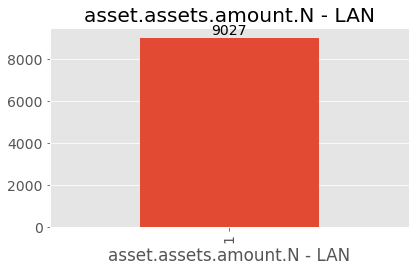

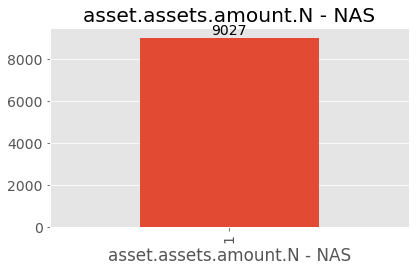

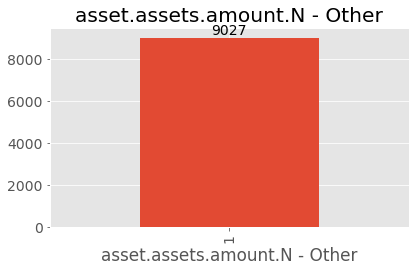

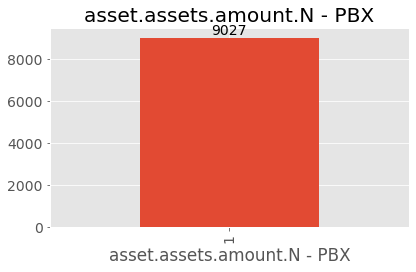

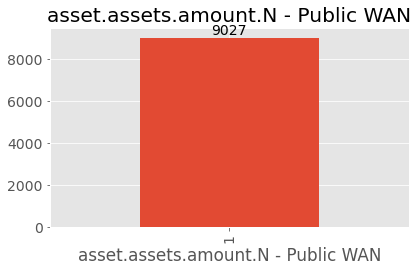

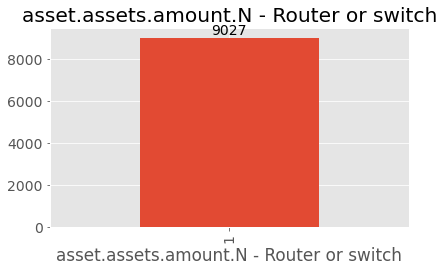

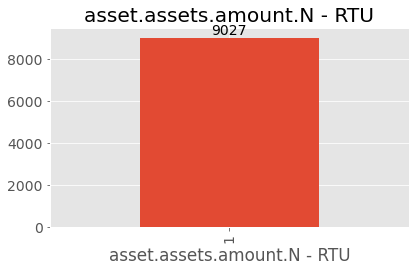

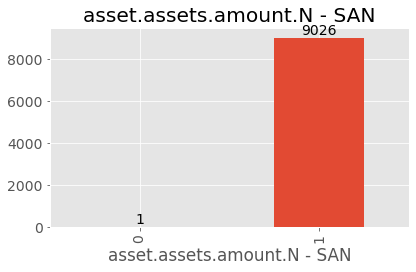

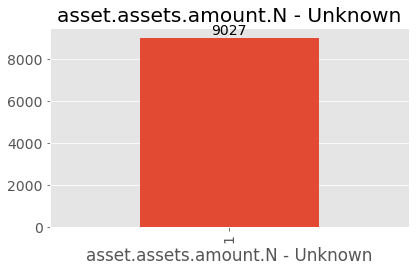

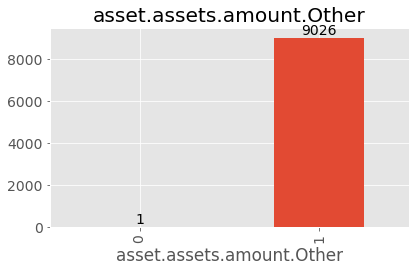

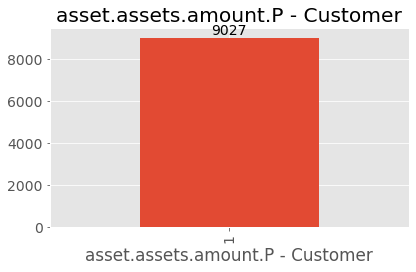

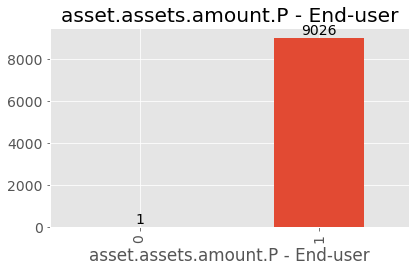

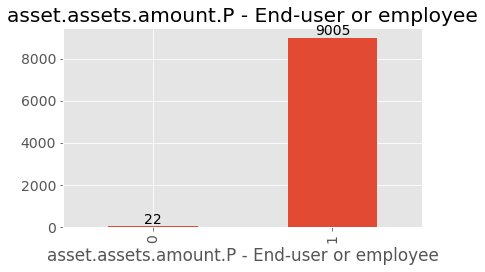

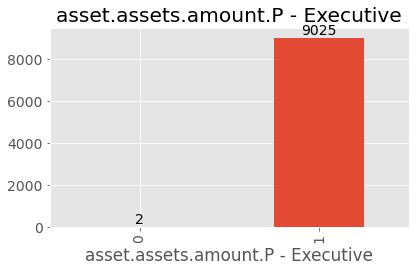

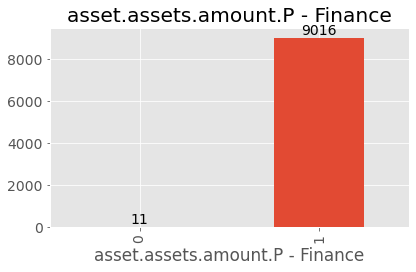

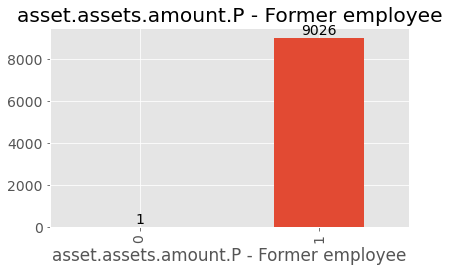

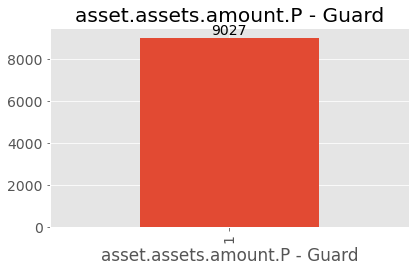

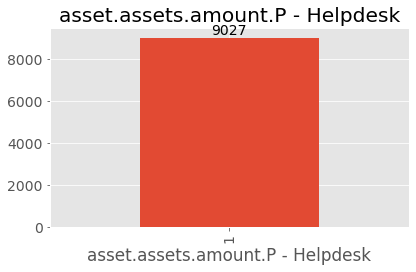

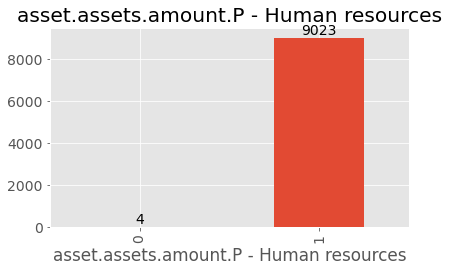

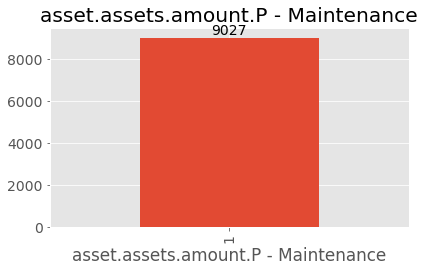

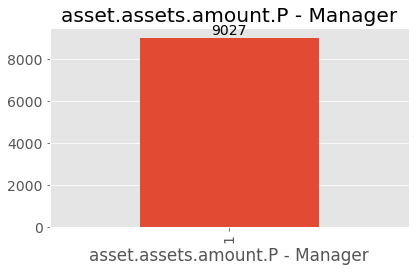

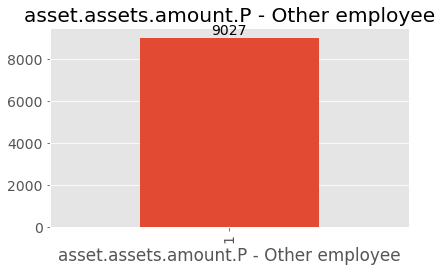

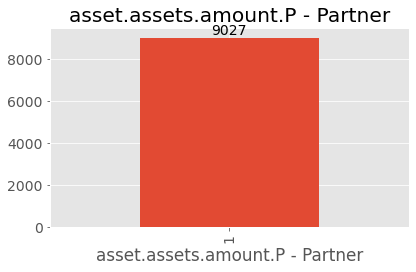

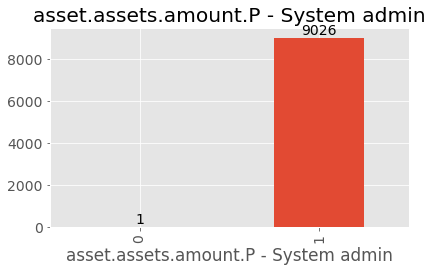

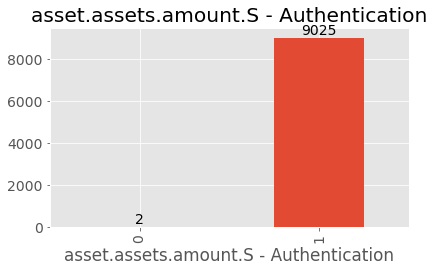

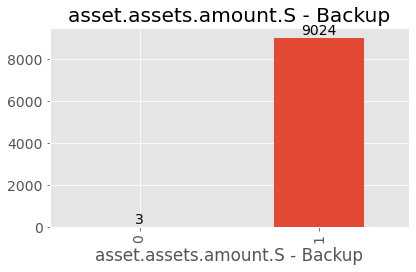

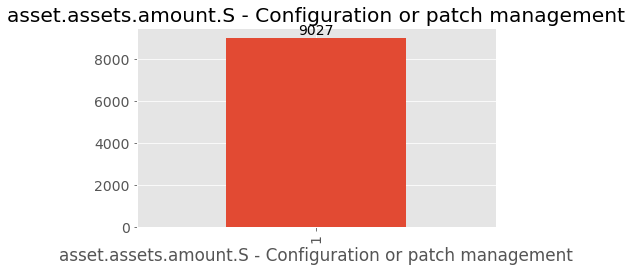

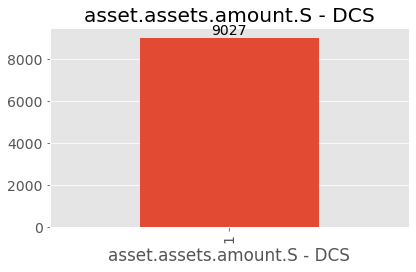

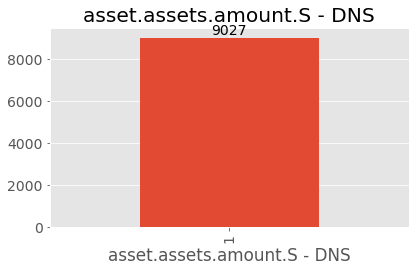

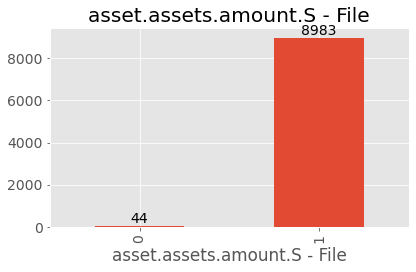

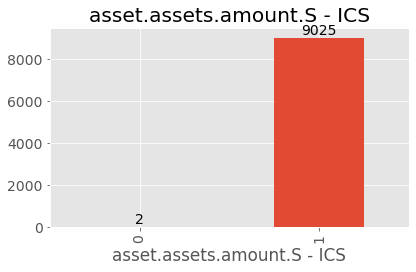

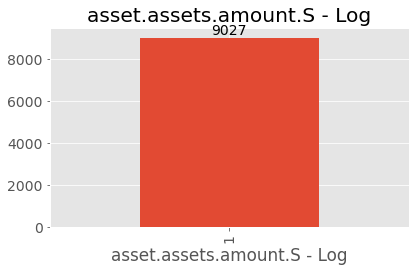

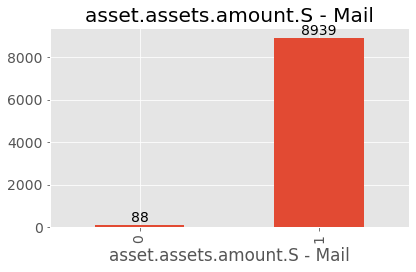

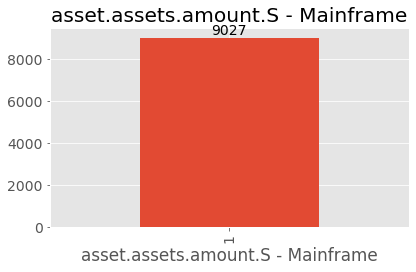

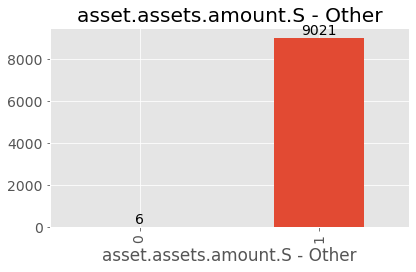

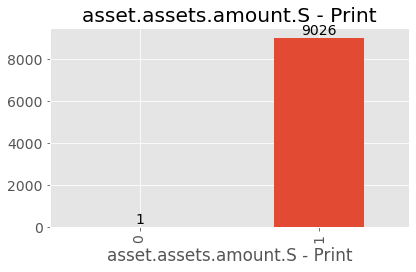

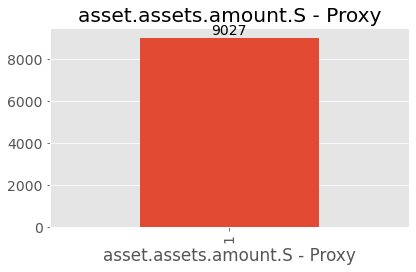

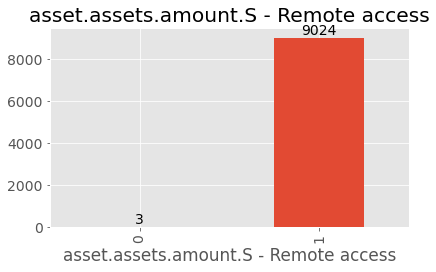

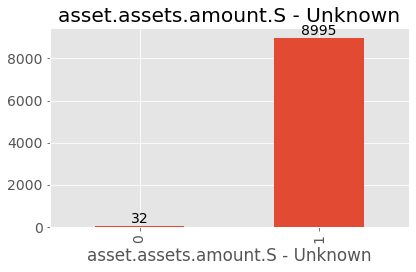

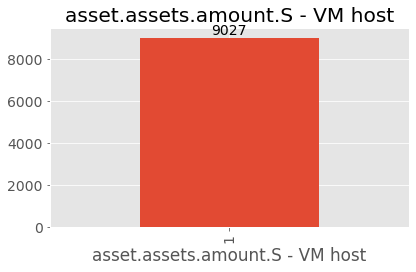

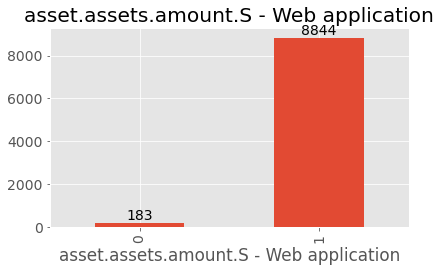

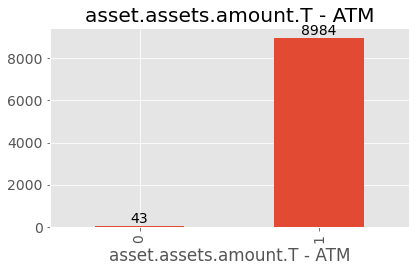

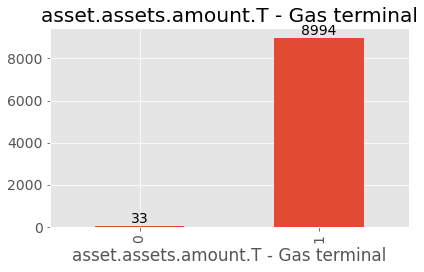

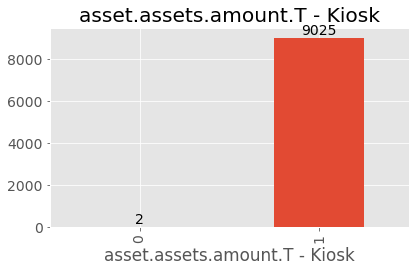

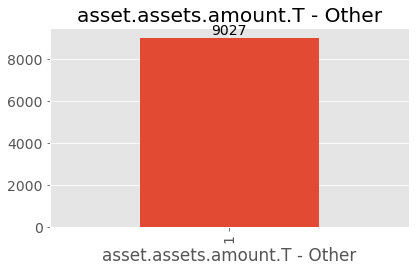

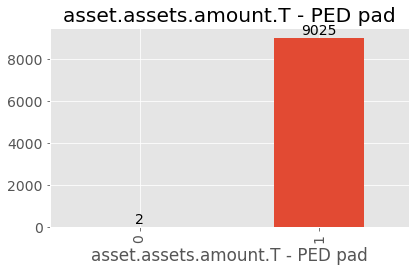

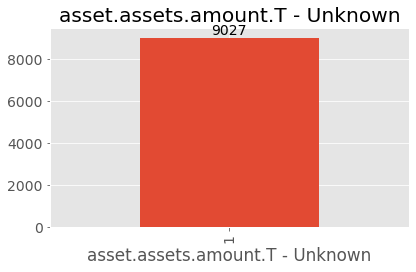

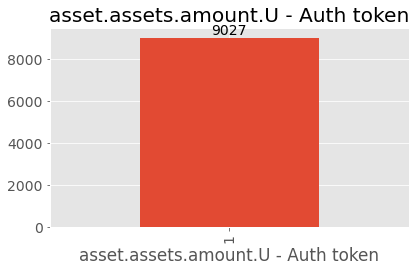

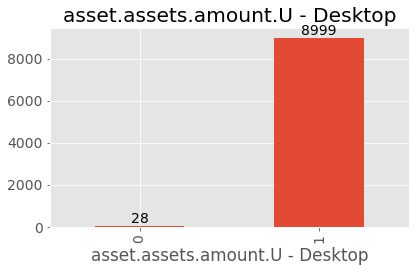

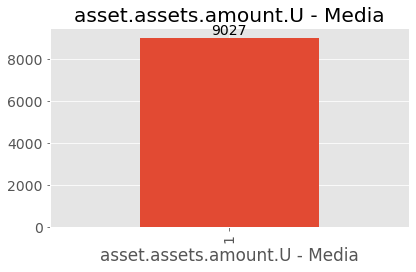

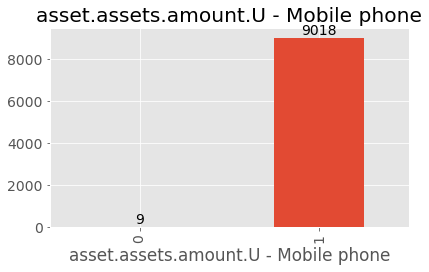

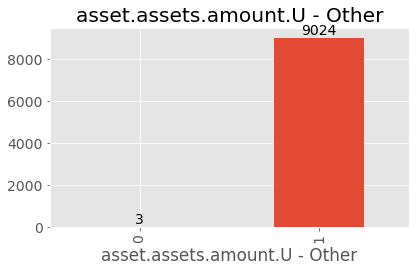

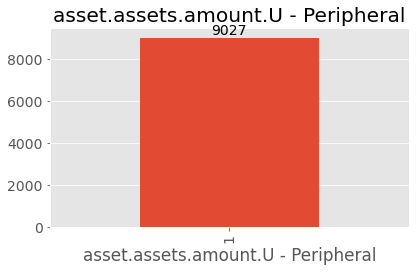

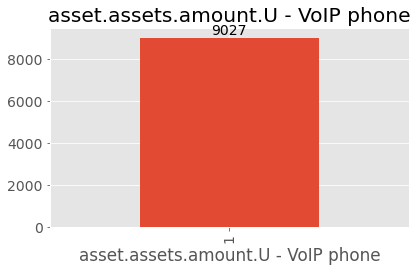

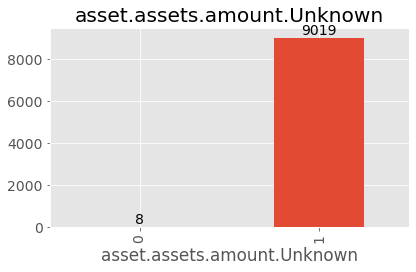

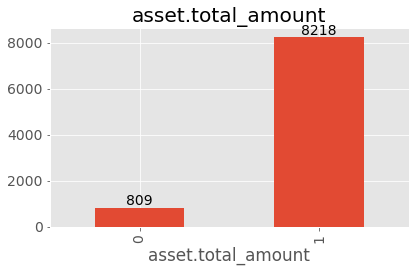

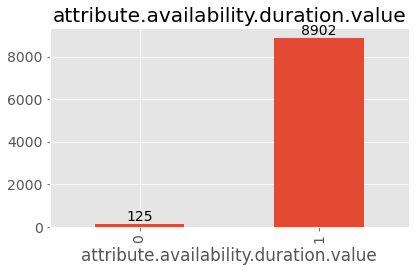

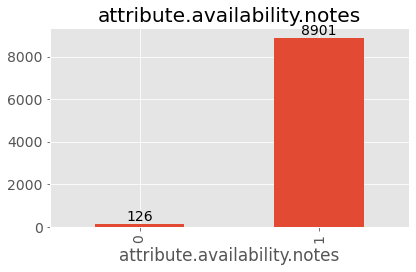

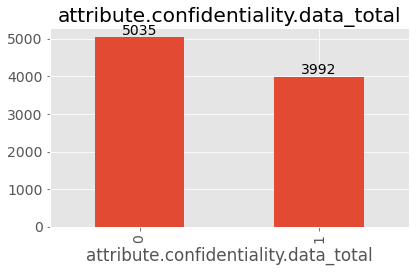

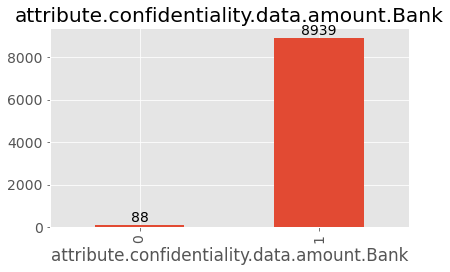

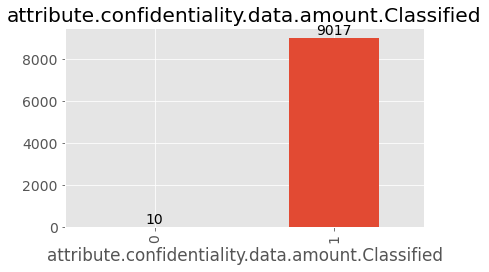

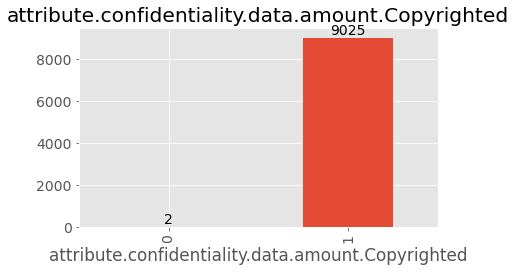

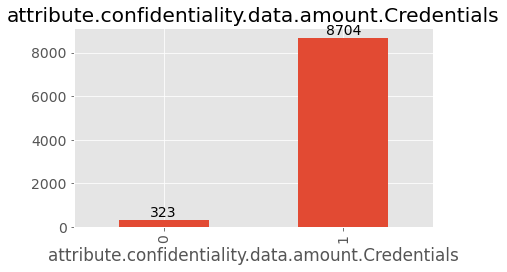

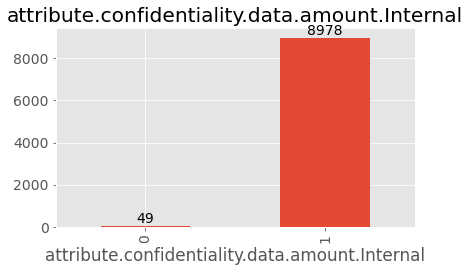

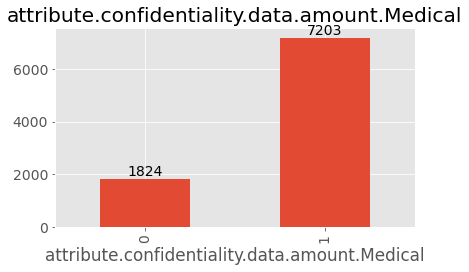

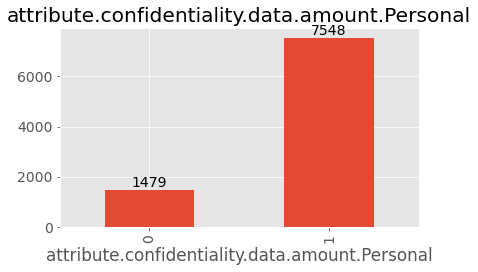

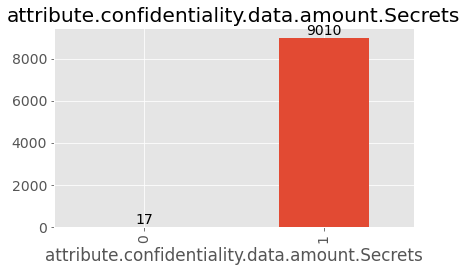

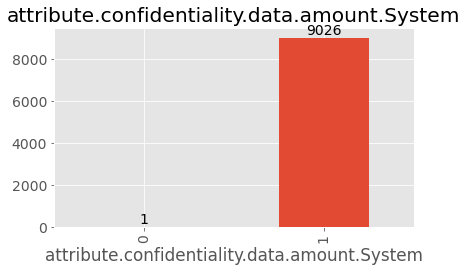

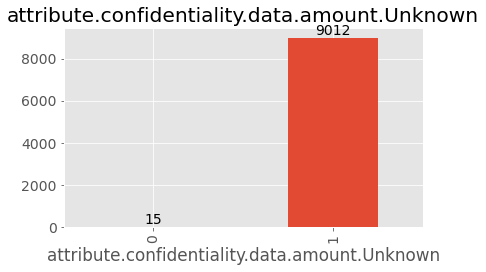

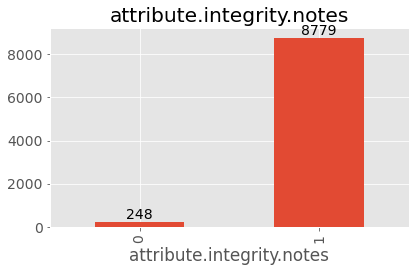

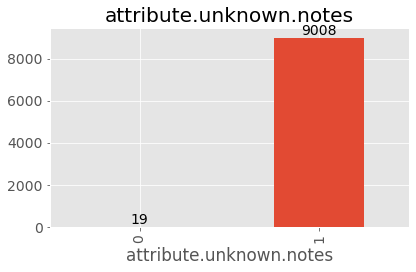

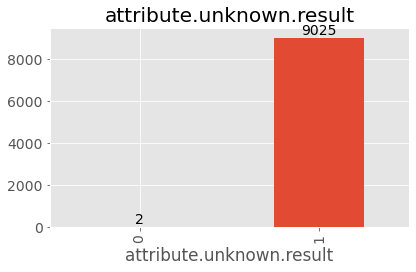

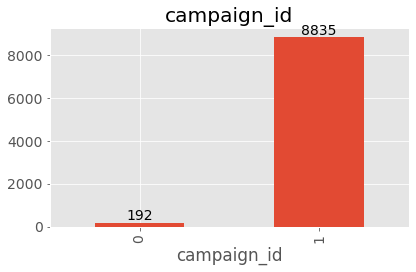

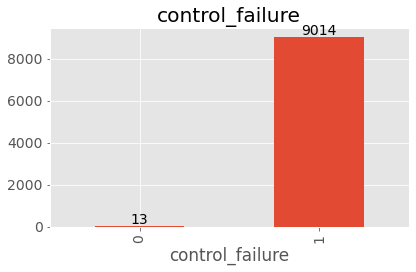

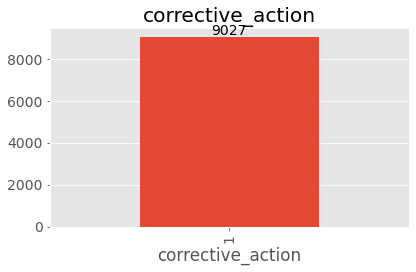

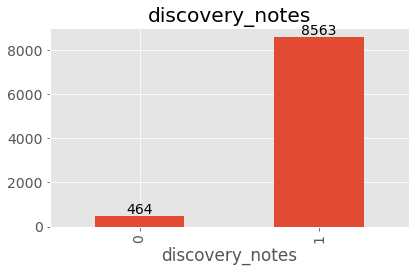

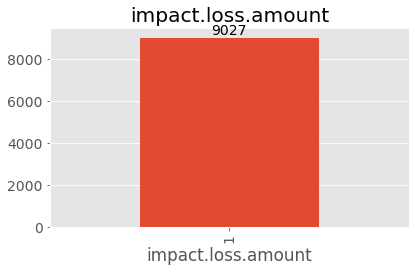

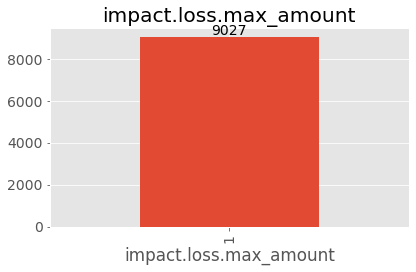

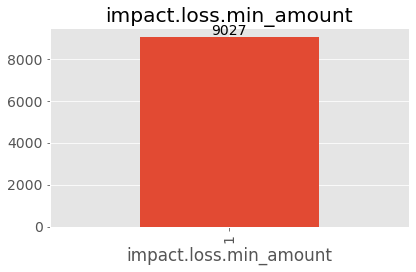

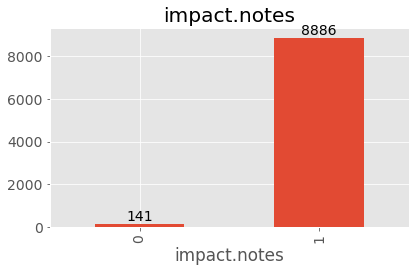

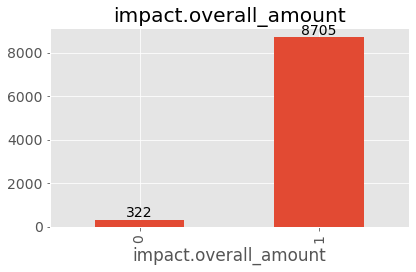

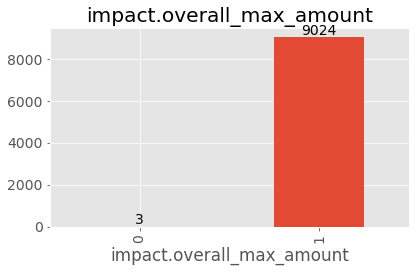

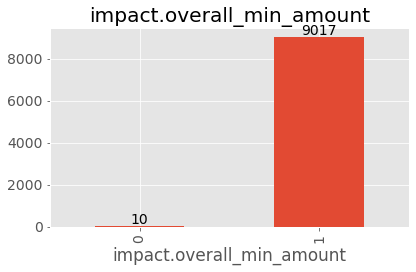

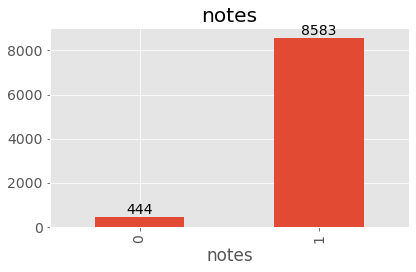

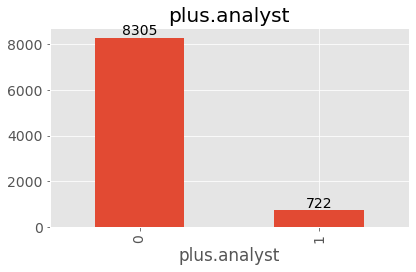

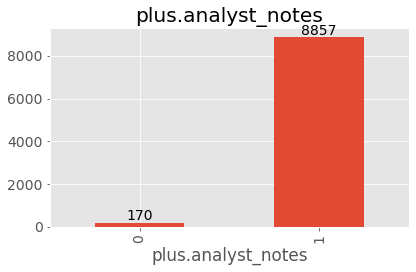

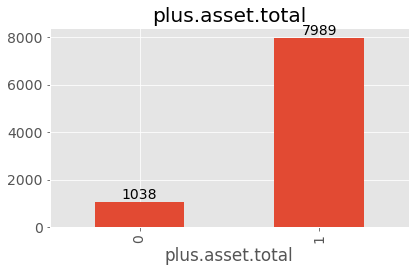

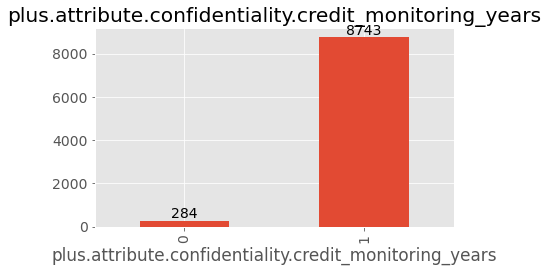

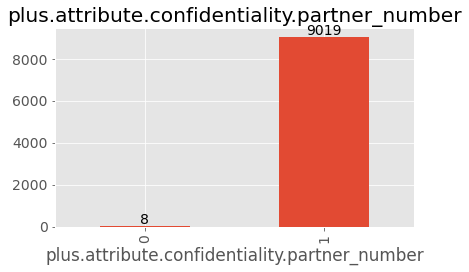

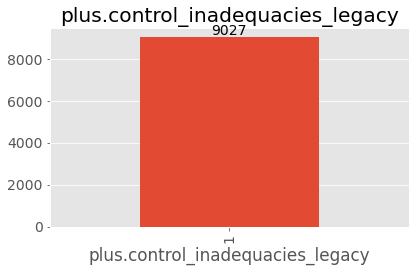

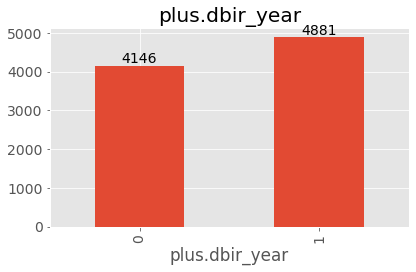

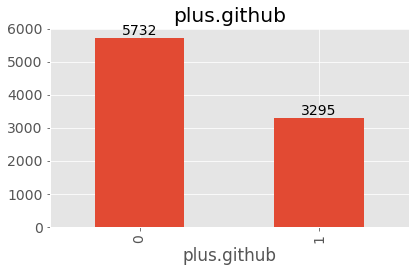

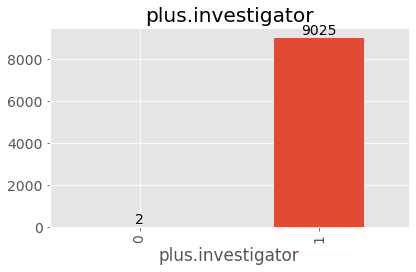

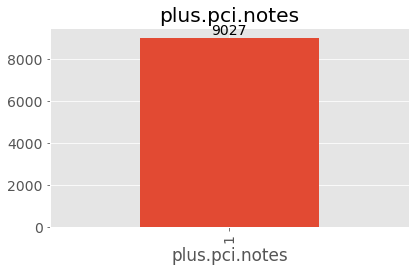

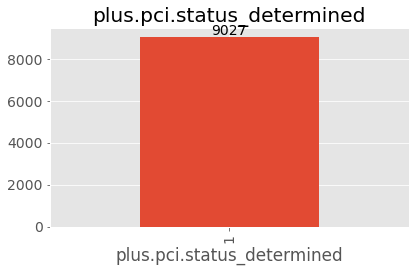

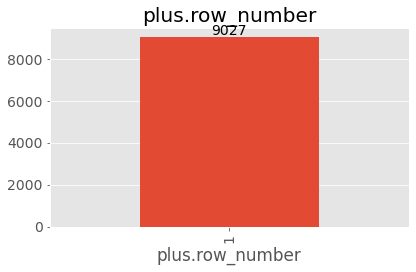

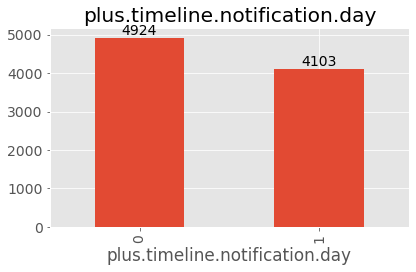

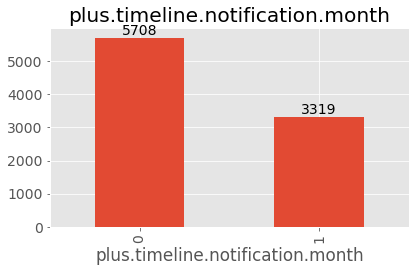

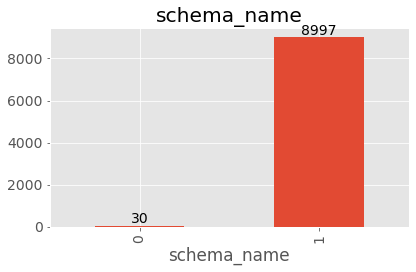

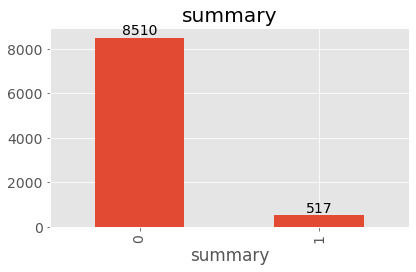

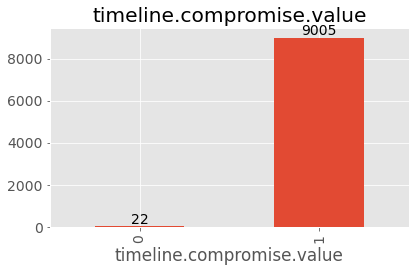

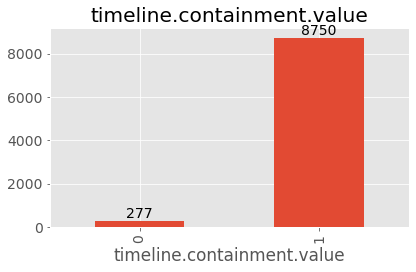

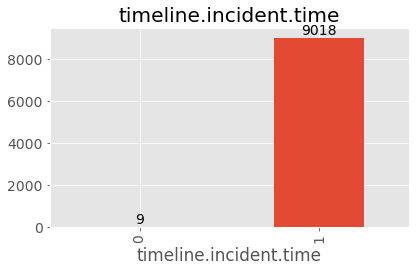

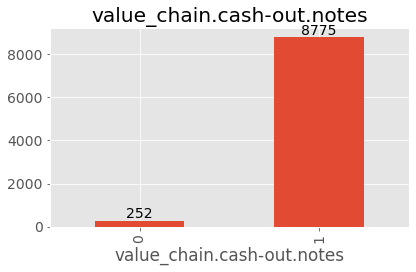

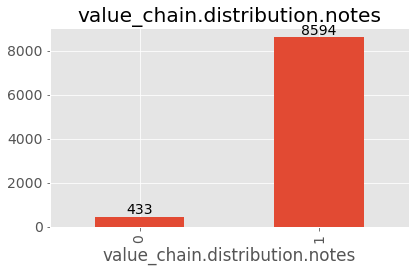

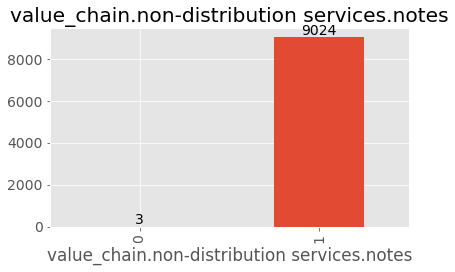

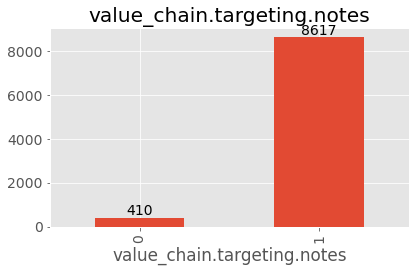

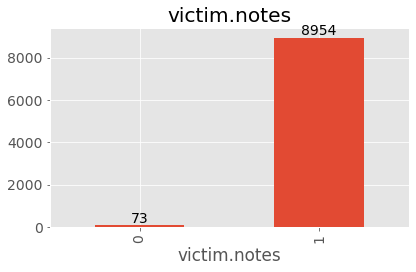

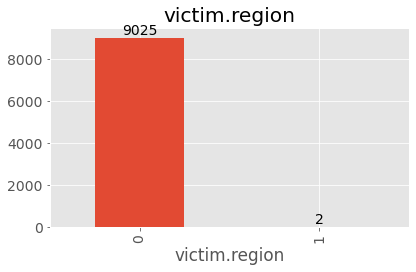

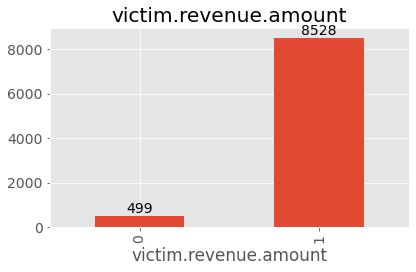

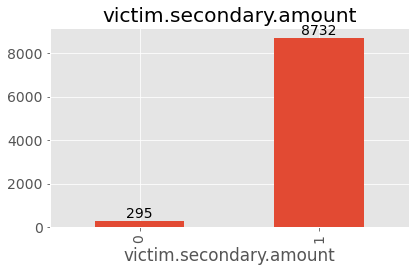

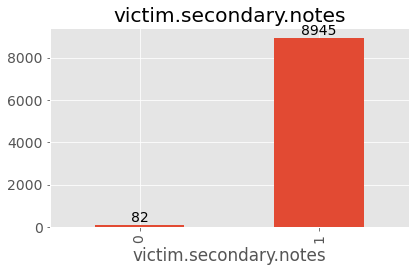

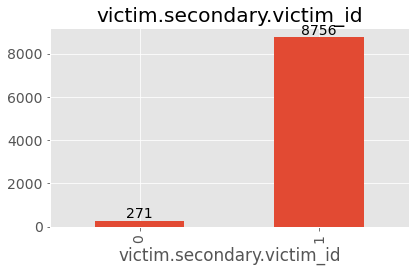

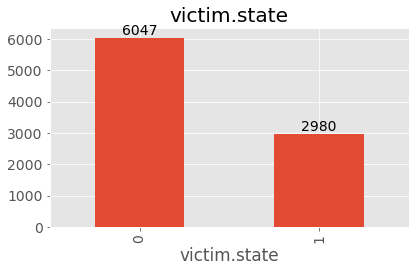

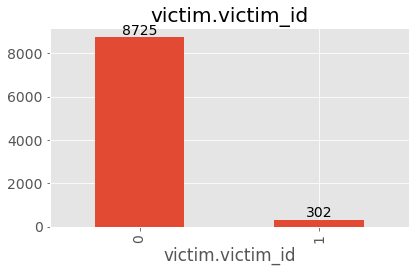

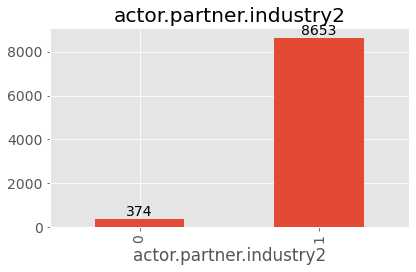

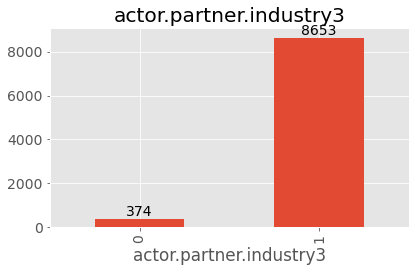

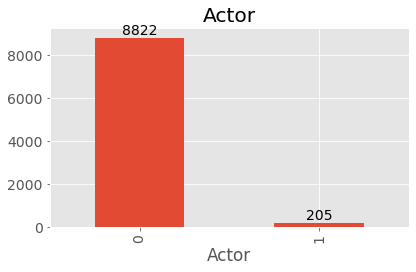

In [27]:
# Assessing Relationship between Missing Values and Confirmed Security Incident

for feature in features_with_nan:
    data = df.copy()
    
    # Create indicator if observation has missing value or no missing values (1 = missing, 0 = no missing)
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Plot Security Confirmed Incident and compare each feature with missing values
    fig, ax = plt.subplots()
    
    ax = data.groupby(feature)['security_incident.Confirmed'].sum().plot.bar()
    plt.title(feature)
    ax.bar_label(ax.containers[0], label_type='edge')
    
    # Adjust default figure and font sizes for easier viewing.
    plt.rcParams['figure.figsize'] = (6, 4)
    fig.tight_layout()
    
    plt.show()

Summary
---

We are trying to determine distribution of null values for the security confirmed events. Majority of features with null values are categorized as True for being a security confirmed event however a majority of the dataset contains security incident confirmed events compared to suspected and false positive ~(<3%) (Need to confirm).

Currently we are seeing for each feature, the total number of row values that contained a null value and a total number of row values that contained a non-null. However, we need to also see the breakdown of all the null values which ones were security incident confirmed events and which ones were not as well as review the non-null values and determine which ones were security confirmed events, and which ones were not.

We do know that majority of field with nan values are associated with being security confirmed events (Need to confirm). So it is likely that  these features show nulls values for cases where the security incident was confirmed. We may consider dropping these variable since they do not provide useful.



### Reviewing Numerical Variables

In [47]:
pd.set_option("display.max_rows", 2550)
df.dtypes

action.environmental.notes                                                                             object
action.environmental.variety.Deterioration                                                               bool
action.environmental.variety.Earthquake                                                                  bool
action.environmental.variety.EMI                                                                         bool
action.environmental.variety.ESD                                                                         bool
action.environmental.variety.Fire                                                                        bool
action.environmental.variety.Flood                                                                       bool
action.environmental.variety.Hazmat                                                                      bool
action.environmental.variety.Humidity                                                                    bool
action.env

In [91]:
# Reviewing Unique Ids
print('Incident ID overview')
display(df['incident_id'].value_counts())

print('Master ID overview')
display(df['plus.master_id'].value_counts())

Incident ID overview


18086BDC-29DD-46F7-8A05-A372C392CA95    3
00163384-B4D7-46D5-9E6F-543DFB00F598    2
ad2653d0-d3bd-11e8-9659-2bc8d207b0aa    2
d24d7280-6b0c-11e7-9b43-bf152d61c1c6    2
0001AA7F-C601-424A-B2B8-BE6C9F5164E7    1
                                       ..
5dd57d30-749a-11eb-b6c3-130fdd35ca3d    1
5455CCA3-15A7-42F4-BBD2-4B892CCE8CF5    1
54537485-2A04-40C9-80E6-3D414F2C9E60    1
544D856A-2EF8-42A7-A713-22EA9D9343C7    1
9c0fa860-2444-11eb-af35-ed9bb3f10d5f    1
Name: incident_id, Length: 9103, dtype: int64

Master ID overview


f100b661-46be-40f0-a2ea-d56a997cf0e1    2
00163384-B4D7-46D5-9E6F-543DFB00F598    2
de9d58cb-bbe4-4882-a0c4-0f8366e90ccf    2
0001AA7F-C601-424A-B2B8-BE6C9F5164E7    1
AAE3EE16-409E-4D79-9683-DDE997E0AE77    1
                                       ..
54537485-2A04-40C9-80E6-3D414F2C9E60    1
544D856A-2EF8-42A7-A713-22EA9D9343C7    1
5447F473-1FE3-4095-B721-8C5E90994B91    1
54305a89-ebf0-4ec8-b101-0656784850c1    1
fffb4adf-21db-49e1-8afe-039daf7e2a3a    1
Name: plus.master_id, Length: 9105, dtype: int64

Summary
---

Master ID seems to have the most number of unique values and may be consider to be the index column for the dataset after dropping duplicates. Need to verify that these records are indeed unique however.

In [133]:
# Reviewing Numerical Variables
numerical_features = []

for feature in df.columns:
    if df[feature].dtypes != bool and df[feature].dtypes != object:
        numerical_features.append(feature)

print(f'Number of numerical variables: {len(numerical_features)}')

df[numerical_features].head(10)

Number of numerical variables: 148


actor.partner.industry  asset.assets.amount.E - Other  \
0                     NaN                            NaN   
1                     NaN                            NaN   
2                     NaN                            NaN   
3                     0.0                            NaN   
4                     NaN                            NaN   
5                     NaN                            NaN   
6                     NaN                            NaN   
7                     NaN                            NaN   
8                     NaN                            NaN   
9                     NaN                            NaN   

   asset.assets.amount.E - Telematics  asset.assets.amount.E - Telemetry  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   
5                                 NaN                                NaN   
6                                 NaN                                NaN   
7                                 NaN                                NaN   
8                                 NaN                                NaN   
9                                 NaN                                NaN   

   asset.assets.amount.E - Unknown  asset.assets.amount.M - Disk drive  \
0                              NaN                                 NaN   
1                              NaN                                 NaN   
2                              NaN                                 NaN   
3                              NaN                                 NaN   
4                              NaN                                 NaN   
5                              NaN                                 NaN   
6                              NaN                                 NaN   
7                              NaN                                 NaN   
8                              NaN                                 NaN   
9                              NaN                                 NaN   

   asset.assets.amount.M - Disk media  asset.assets.amount.M - Documents  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   
5                                 NaN                                NaN   
6                                 NaN                                NaN   
7                                 NaN                                NaN   
8                                 NaN                                NaN   
9                                 NaN                                NaN   

   asset.assets.amount.M - Fax  asset.assets.amount.M - Flash drive  \
0                          NaN                                  NaN   
1                          NaN                                  NaN   
2                          NaN                                  NaN   
3                          NaN                                  NaN   
4                          NaN                                  NaN   
5                          NaN                                  NaN   
6                          NaN                                  NaN   
7                          NaN                                  NaN   
8                          NaN                                  NaN   
9                          NaN                                  NaN   

   asset.assets.amount.M - Other  asset.assets.amount.M - Payment card 

### Review Temporal/Datetime Variables

In [99]:
# Create list of variables that contain Year information
year_features = []

for feature in numerical_features:
    if 'plus.attribute.confidentiality.credit_monitoring_years' in feature.lower():
        pass
    elif 'year' in feature.lower():
        year_features.append(feature)
        
df[year_features].head()

plus.dbir_year  plus.timeline.notification.year  timeline.incident.year
0          2014.0                              NaN                    2010
1          2022.0                           2020.0                    2020
2             NaN                           2014.0                    2014
3             NaN                           2014.0                    2014
4             NaN                           2012.0                    2012

In [100]:
# See overview of unique values in year features:
for feature in year_features:
    print(feature, df[feature].unique())

plus.dbir_year [2014. 2022.   nan 2018. 2019. 2017. 2016. 2021. 2020. 2015. 2005. 2007.
 2013. 2010. 2002. 2012.]
plus.timeline.notification.year [      nan 2.020e+03 2.014e+03 2.012e+03 2.017e+03 2.013e+03 2.016e+03
 2.015e+03 2.011e+03 2.018e+03 2.010e+03 2.006e+03 2.019e+03 2.007e+03
 2.021e+03 2.008e+03 2.103e+03 2.009e+03 1.971e+03 2.001e+03 2.002e+03
 2.023e+03 2.002e+04 2.005e+03 1.994e+03 2.700e+01 2.030e+02 7.000e+00
 1.900e+01 9.000e+00 2.102e+03 2.003e+03 1.999e+03 2.004e+03 2.000e+00
 2.020e+02 1.300e+01 1.600e+01 1.984e+03]
timeline.incident.year [2010 2020 2014 2012 2017 2013 2011 2018 2016 2015 2019 2009 2007 2006
 2008 2003 2005 2021 2004 1998 2001 1971 2002 1994 1999 1995 1984 2000]


Text(0.5, 1.0, 'Number of Incidents Over Time')

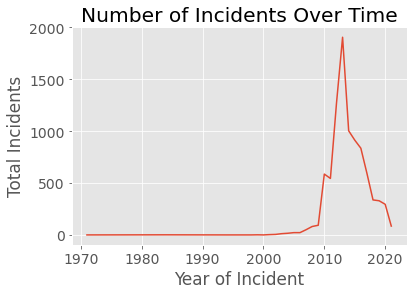

In [107]:
# Analyze temporal features
# Is there an association between security incident confirmed compared to year features
df.groupby('timeline.incident.year')['security_incident.Confirmed'].sum().plot()
plt.xlabel('Year of Incident')
plt.ylabel('Total Incidents')
plt.title('Number of Incidents Over Time')

In [132]:
# Review Discrete and continuous features:

# discrete_features = [feature for features in numerical_features if len(df[features].unique()) < 25 and feature not in year_features and '_id' not in numerical_features.lower()]


discrete_features = []

for feature in numerical_features:
    if len(df[feature].unique()) < 25 and feature not in year_features and '_id' not in feature.lower() and np.round(df[feature].isnull().mean() * 100, 4) < 70:
        discrete_features.append(feature)
        
print(f'Discrete features count: {len(discrete_features)}, \n {discrete_features}')

Discrete features count: 2, 
 ['plus.timeline.notification.month', 'timeline.incident.month']


Summary
---

Majority of numeric values have missing values resulting in "pseudo-discrete" values, need a way to filter fields with large missing values and keep discrete ones. Currently filtering using a null percentage threshold of 70% or less.


In [119]:
df['asset.assets.amount.E - Other'].unique()

array([nan])

In [5]:
# Incident and Breaches by Industry

display(df['victim.industry.name'].value_counts(normalize=True))
display(df['victim.industry.name'].count())


display(df['victim.victim_id'].value_counts().to_frame())
display(df['victim.victim_id'].count())


Healthcare         0.268516
Public             0.255251
Finance            0.087995
Information        0.082467
Educational        0.056379
Retail             0.051072
Professional       0.043445
Unknown            0.024983
Manufacturing      0.023767
Other Services     0.022662
Administrative     0.018793
Accomodation       0.017356
Transportation     0.011276
Trade              0.009618
Entertainment      0.008512
Real Estate        0.005306
Utilities          0.004422
Construction       0.003206
Mining             0.002764
Management         0.001658
Agriculture        0.000553
Name: victim.industry.name, dtype: float64

9046

victim.victim_id
United States Department of Veterans Affairs               873
Unknown                                                     73
US National Security Agency (NSA)                           14
Facebook                                                    12
7-Eleven                                                    12
...                                                        ...
Hotel Hippo                                                  1
Life Choices Community Health Services                       1
U.S. Sentencing Commission                                   1
PARK HILL SCHOOL DISTRICT                                    1
Awanui Rest Home                                             1

[6679 rows x 1 columns]

8737

In [24]:
df_us_total = df['plus.analysis_status.Finalized'] == True
df_us_total.value_counts()

False    7203
True     1843
Name: plus.analysis_status.Finalized, dtype: int64

In [11]:
df.describe()

actor.partner.industry  asset.assets.amount.E - Other  \
count              376.000000                            0.0   
mean            213329.457447                            NaN   
std             262175.606810                            NaN   
min                  0.000000                            NaN   
25%                  0.000000                            NaN   
50%                529.500000                            NaN   
75%             522542.500000                            NaN   
max             813410.000000                            NaN   

       asset.assets.amount.E - Telematics  asset.assets.amount.E - Telemetry  \
count                                 0.0                                0.0   
mean                                  NaN                                NaN   
std                                   NaN                                NaN   
min                                   NaN                                NaN   
25%                                   NaN                                NaN   
50%                                   NaN                                NaN   
75%                                   NaN                                NaN   
max                                   NaN                                NaN   

       asset.assets.amount.E - Unknown  asset.assets.amount.M - Disk drive  \
count                              0.0                           11.000000   
mean                               NaN                            1.909091   
std                                NaN                            2.385563   
min                                NaN                            1.000000   
25%                                NaN                            1.000000   
50%                                NaN                            1.000000   
75%                                NaN                            1.500000   
max                                NaN                            9.000000   

       asset.assets.amount.M - Disk media  asset.assets.amount.M - Documents  \
count                            8.000000                          80.000000   
mean                             1.250000                       13998.875000   
std                              0.707107                       89216.914969   
min                              1.000000                           1.000000   
25%                              1.000000                           1.000000   
50%                              1.000000                          45.500000   
75%                              1.000000                        1005.000000   
max                              3.000000                      780000.000000   

       asset.assets.amount.M - Fax  asset.assets.amount.M - Flash drive  \
count                          1.0                            14.000000   
mean                           1.0                             1.428571   
std                            NaN                             0.646206   
min                            1.0                             1.000000   
25%                            1.0                             1.000000   
50%                            1.0                             1.000000   
75%                            1.0                             2.000000   
max                            1.0                             3.000000   

       asset.assets.amount.M - Other  asset.assets.amount.M - Payment card  \
count                        4.00000                             18.000000   
mean                        33.50000                             84.944444   
std                         64.33506                            304.896216   
min                          1.00000                              1.000000   
25%                          1.00000                              1.000000   
50%                          1.50000                              1.000000   
75%                         34.00000                           

action.environmental.notes                                                                             object
action.environmental.variety.Deterioration                                                               bool
action.environmental.variety.Earthquake                                                                  bool
action.environmental.variety.EMI                                                                         bool
action.environmental.variety.ESD                                                                         bool
action.environmental.variety.Fire                                                                        bool
action.environmental.variety.Flood                                                                       bool
action.environmental.variety.Hazmat                                                                      bool
action.environmental.variety.Humidity                                                                    bool
action.env

### Filtering and Cleaning Data
Scope:
- United States
- Incidents, Data Breaches, Near Miss and False Positives
- Finalized Records Only

In [27]:
df_us = df[(df['victim.country.US'] == True) & (df['plus.analysis_status.Finalized'] == True)]
df_us.head(15)


# Note: need to decide whether to use Finalized results (reviewed by person seeing all data) or those with at least one review.

action.environmental.notes  action.environmental.variety.Deterioration  \
19                         NaN                                       False   
20                         NaN                                       False   
22                         NaN                                       False   
25                         NaN                                       False   
29                         NaN                                       False   
51                         NaN                                       False   
54                         NaN                                       False   
64                         NaN                                       False   
87                         NaN                                       False   
102                        NaN                                       False   
118                        NaN                                       False   
122                        NaN                                       False   
123                        NaN                                       False   
124                        NaN                                       False   
131                        NaN                                       False   

     action.environmental.variety.Earthquake  \
19                                     False   
20                                     False   
22                                     False   
25                                     False   
29                                     False   
51                                     False   
54                                     False   
64                                     False   
87                                     False   
102                                    False   
118                                    False   
122                                    False   
123                                    False   
124                                    False   
131                                    False   

     action.environmental.variety.EMI  action.environmental.variety.ESD  \
19                              False                             False   
20                              False                             False   
22                              False                             False   
25                              False                             False   
29                              False                             False   
51                              False                             False   
54                              False                             False   
64                              False                             False   
87                              False                             False   
102                             False                             False   
118                             False                             False   
122                             False                             False   
123                             False                             False   
124                             False                             False   
131                             False                             False   

     action.environmental.variety.Fire  action.environmental.variety.Flood  \
19                               False                               False   
20                               False                               False   
22                               False                               False   
25                               False                               False   
29                               False                               False   
51                               False                               False   
54                               False                               False   
64                               False                               False   
87                               False                               False   
102  

In [26]:
df_us.shape

(6416, 2550)

In [18]:
# Total Incidents by Industry in the US
df_us['victim.industry.name'].value_counts().plot(kind='bar')
plt.title("Total Recorded Events by Industry")
plt.xlabel("Type of Industry")
plt.ylabel("Number of Recorded Events")

Text(0, 0.5, 'Number of Recorded Events')